In [83]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [75]:
# Load the dataset
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [76]:
df = df[['winpercent', 'pricepercent', 'sugarpercent', 'caramel', 'fruity', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'chocolate']]

In [77]:
TrainingSet, TestSet = train_test_split(df, test_size=0.2)

In [78]:
X_train = TrainingSet[['fruity', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'caramel', 'pricepercent', 'sugarpercent', 'winpercent']]
Y_train = TrainingSet['chocolate']
X_test = TestSet[['fruity', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'caramel', 'pricepercent', 'sugarpercent', 'winpercent']]
Y_test = TestSet['chocolate']

C:\Users\HP\AppData\Local\Temp\ipykernel_9896\267662863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="chocolate", data=TrainingSet, palette="bwr")


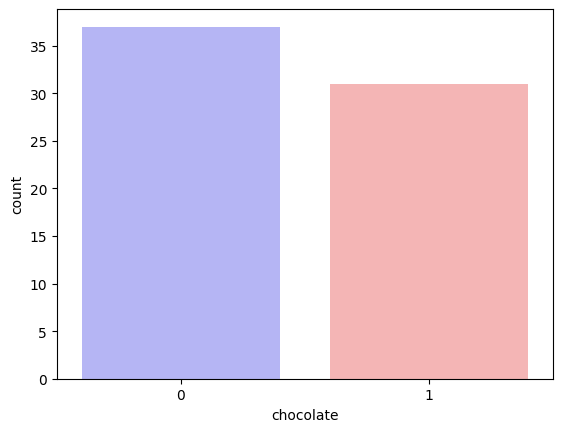

In [79]:
sns.countplot(x="chocolate", data=TrainingSet, palette="bwr")
plt.show()

In [80]:
count_no_chocolate = len(TrainingSet[TrainingSet['chocolate'] == 0])
count_chocolate = len(TrainingSet[TrainingSet['chocolate'] == 1])
pct_of_no_chocolate = count_no_chocolate/(count_no_chocolate+count_chocolate)
print("Percentage of no chocolate candies: {:.2f}%".format(pct_of_no_chocolate*100))
pct_of_chocolate = count_chocolate/(count_no_chocolate+count_chocolate)
print("Percentage of chocolate candies: {:.2f}%".format(pct_of_chocolate*100))

Percentage of no chocolate candies: 54.41%
Percentage of chocolate candies: 45.59%


In [81]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [84]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[10,  1],
       [ 0,  6]])

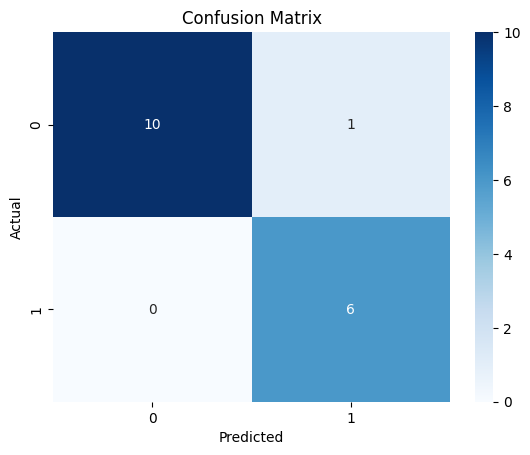

In [85]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [86]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9411764705882353
Precision: 0.8571428571428571
Recall: 1.0
